In [20]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import xarray as xr

In [21]:
cwd = os.getcwd()
chemin_data=os.path.join(os.path.split(cwd)[0],"dataset\\PLP2019\\S2_satellite_images_nc\\")
chemin_data

'c:\\Users\\lavra\\Documents\\imt_atlantique_2A\\projet_s4b2\\dataset\\PLP2019\\S2_satellite_images_nc\\'

In [22]:

print(os.path.abspath(chemin_data))

path=os.path.abspath(chemin_data)
liste_fichier=os.listdir(path)

for i,fichier in enumerate(liste_fichier):
    liste_fichier[i]=os.path.join(path,fichier)


c:\Users\lavra\Documents\imt_atlantique_2A\projet_s4b2\dataset\PLP2019\S2_satellite_images_nc


In [23]:
liste_fichier

['c:\\Users\\lavra\\Documents\\imt_atlantique_2A\\projet_s4b2\\dataset\\PLP2019\\S2_satellite_images_nc\\S2A_20180607_L2W_AOI.nc',
 'c:\\Users\\lavra\\Documents\\imt_atlantique_2A\\projet_s4b2\\dataset\\PLP2019\\S2_satellite_images_nc\\S2A_20190503_L2W_AOI.nc',
 'c:\\Users\\lavra\\Documents\\imt_atlantique_2A\\projet_s4b2\\dataset\\PLP2019\\S2_satellite_images_nc\\S2B_20190418_L2W_AOI.nc',
 'c:\\Users\\lavra\\Documents\\imt_atlantique_2A\\projet_s4b2\\dataset\\PLP2019\\S2_satellite_images_nc\\S2B_20190518_L2W_AOI.nc',
 'c:\\Users\\lavra\\Documents\\imt_atlantique_2A\\projet_s4b2\\dataset\\PLP2019\\S2_satellite_images_nc\\S2B_20190528_L2W_AOI.nc',
 'c:\\Users\\lavra\\Documents\\imt_atlantique_2A\\projet_s4b2\\dataset\\PLP2019\\S2_satellite_images_nc\\S2B_20190607_L2W_AOI.nc']

In [24]:
data=[]#définition d'une liste contenant touts les netcdf files

for fichier in liste_fichier:
    data.append(Dataset(fichier))

print(data[3])#data contient maintenant tout les netCDF files

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    generated_by: ACOLITE
    generated_on: 2019-07-24 18:15:44 GTB Daylight Time
    contact: Quinten Vanhellemont
    product_type: NetCDF
    metadata_profile: beam
    metadata_version: 0.5
    auto_grouping: rhot:rhorc:rhos:rhow:Rrs
    sensor: S2B_MSI
    isodate: 2019-05-18T09:09:44.378747Z
    THS: 23.6941361018797
    THV: 4.843773512727273
    AZI: 38.76869842583568
    pressure: 1013.25
    aerosol_correction: dark_spectrum
    proj4_string: +proj=utm +zone=35 +datum=WGS84 +units=m +no_defs 
    xrange: [462300. 462720.]
    yrange: [4328760. 4329000.]
    pixel_size: [10 10]
    THS-true: 23.6941361018797
    output_base: C:/Users/zabelamebati/Documents/MRSG/EMP/20190518/acolite/S2B_MSI_2019_05_18_08_56_09_T35SMD
    output_dir: C:/Users/zabelamebati/Documents/MRSG/EMP/20190518/acolite
    output_name: S2B_MSI_2019_05_18_08_56_09_T35SMD
    l1_file: C:/Users/zabelamebati/Documents/MRSG/PLP

In [37]:
#avoir les clefs des variables du dataset (on s'interesse uniquement a rhow dans un premier temps + lon lat)
root=data[0]

for i in data:#print toutes les variables possibles
    print(i.variables.keys())

dict_keys(['lon', 'lat', 'l2_flags', 'rhot_443', 'rhot_492', 'rhot_560', 'rhot_665', 'rhot_704', 'rhot_740', 'rhot_783', 'rhot_833', 'rhot_865', 'rhot_945', 'rhot_1373', 'rhot_1614', 'rhot_2202', 'rhos_443', 'rhos_492', 'rhos_560', 'rhos_665', 'rhos_704', 'rhos_740', 'rhos_783', 'rhos_833', 'rhos_865', 'rhos_1614', 'rhos_2202', 'rhow_443', 'rhow_492', 'rhow_560', 'rhow_665', 'rhow_704', 'rhow_740', 'rhow_783', 'rhow_833', 'rhow_865', 'rhow_1614', 'rhow_2202'])
dict_keys(['lon', 'lat', 'l2_flags', 'rhot_443', 'rhot_492', 'rhot_560', 'rhot_665', 'rhot_704', 'rhot_740', 'rhot_783', 'rhot_833', 'rhot_865', 'rhot_945', 'rhot_1373', 'rhot_1614', 'rhot_2202', 'rhos_443', 'rhos_492', 'rhos_560', 'rhos_665', 'rhos_704', 'rhos_740', 'rhos_783', 'rhos_833', 'rhos_865', 'rhos_1614', 'rhos_2202', 'rhow_443', 'rhow_492', 'rhow_560', 'rhow_665', 'rhow_704', 'rhow_740', 'rhow_783', 'rhow_833', 'rhow_865', 'rhow_1614', 'rhow_2202'])
dict_keys(['lon', 'lat', 'l2_flags', 'rhot_442', 'rhot_492', 'rhot_559

#Partie analyse des images: 

On analyse regarde quelles sont les données (rhos, rhow, rhot) pour la premiere image

les fichier netcdf sont construit comme des arbres. Pour acceder a une variable appelée nom_element, on doit faire root\["/nom_element"], ou root.variables\["nom_element"]

Pour acceder à un attribut, on peut soit utiliser root.attribut, soit avoir le dictionnaire des attributs gracee a root.\__dict__




premiere exploration des données

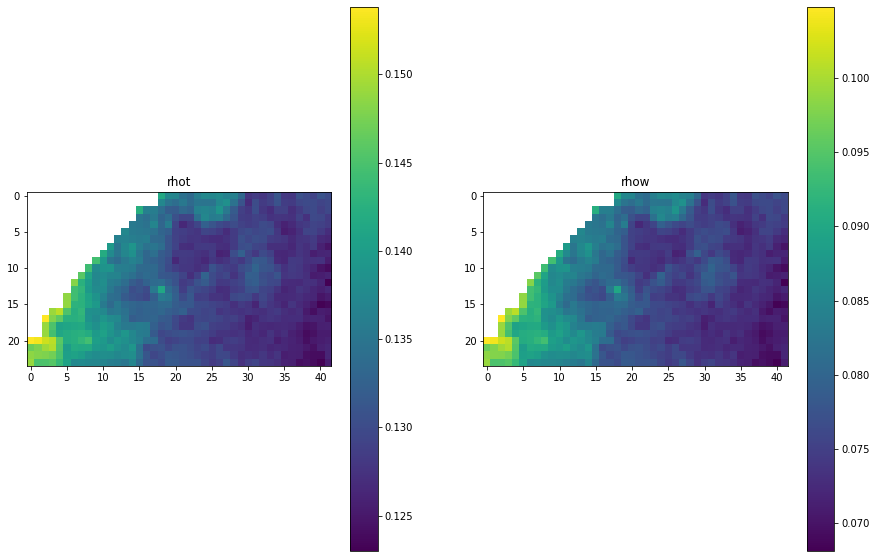

In [36]:
#ici rhot (top of athmosphere), rho_w (correctuib + cote enlever lorsque la reflectance est sup a 0.1)
import numpy.ma as ma


fig=plt.figure(figsize=(15,10))
ax1=plt.subplot(121)
ax1.set_title("rhot")
mask=np.isnan(np.array(root["/rhow_492"]))

to_plot=np.array(root["/rhot_492"])
to_plot[mask]=np.nan
im=ax1.imshow(to_plot)

fig.colorbar(im,ax=ax1)

ax2=plt.subplot(122)
ax2.set_title("rhow")
im=ax2.imshow(root["/rhow_492"])
fig.colorbar(im,ax=ax2)

plt.show()

#on constate des figure trés similaire, mais avec un décalage de valeur de l'ordre de 0.5. les différences sont trés minimes


In [208]:
lon=np.array(root["/lon"])
lat=np.array(root["/lat"])
lon.shape
#print(lon)#j'ai grace à ces coordonnée verifier ou était la zone sur google map 

(24, 42)

max difference rho_t :  0.034299992
max difference rho_w :  0.03660149
différence de correction entre la correction la plus importante et la moins importante  0.0064384043
grâce à la correction, plus de différence entre les pixels, diff de :18.770862445089968%
les pixels plastiques sont les pixels qui ressorte le plus, mais d'autre pixels ressortent également


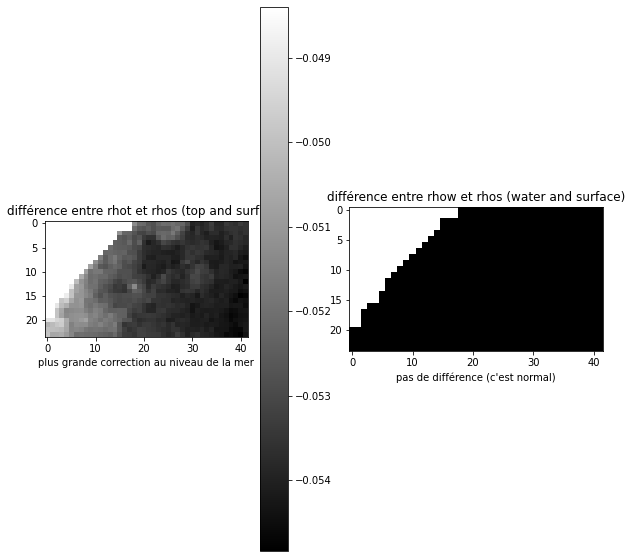

In [35]:
# observatoin de la diffférence entre 

fig=plt.figure(figsize=(10,10))


ax1=plt.subplot(121)
ax1.set_title("différence entre rhot et rhos (top and surface)")
dift_s=np.array(root["/rhos_492"])-np.array(root["/rhot_492"])
dift_s[mask]=np.nan
im=ax1.imshow(dift_s,cmap="gray")

ax1.set_xlabel("plus grande correction au niveau de la mer")


fig.colorbar(im,ax=ax1)

ax2=plt.subplot(122)
ax2.set_title("différence entre rhow et rhos (water and surface)")
difw_s=np.array(root["/rhow_492"])-np.array(root["/rhos_492"])
ax2.imshow(difw_s,cmap="gray")
ax2.set_xlabel("pas de différence (c'est normal)")

to_plot=np.array(root["/rhot_492"])
to_plot[mask]=np.nan
max_dif_t=np.nanmax(to_plot)-np.nanmin(to_plot)
max_dif_w=np.nanmax(np.array(root["/rhow_492"]))-np.nanmin(np.array(root["/rhow_492"]))
max_dif_c=np.nanmax(dift_s)-np.nanmin(dift_s)
print("max difference rho_t : ",max_dif_t)
print("max difference rho_w : ",max_dif_w)
print("différence de correction entre la correction la plus importante et la moins importante ",max_dif_c)
print("grâce à la correction, plus de différence entre les pixels, diff de :"+str(100*max_dif_c/max_dif_t)+"%")
print("les pixels plastiques sont les pixels qui ressorte le plus, mais d'autre pixels ressortent également")

Text(0.5, 0, 'plus grande correction au niveau de la mer')

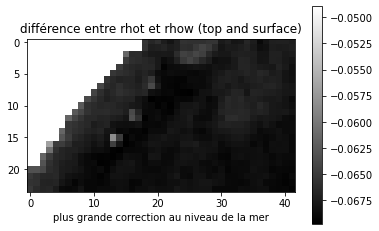

In [41]:
plt.title("différence entre rhot et rhow (top and surface)")
dift_s=np.array(root["/rhos_492"])-np.array(root["/rhot_492"])
dift_s[mask]=np.nan
plt.imshow(dift_s,cmap="gray")
plt.colorbar()
plt.xlabel("plus grande correction au niveau de la mer")




la correction atmosphérique est en revanche importante (différence significative de l'ordre de 30% de la valeur max) Elle semble faire ressortir le plastique